In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
try:
    ticker = str(input('enter stock ticker:'))
    stock = yf.Ticker(ticker)
except:
    e = sys.exc_info()[0]
    print(f'There was an error: {e}')

In [3]:
def find_changes(period):
    close = stock.history(period)['Close']
    close = close.to_frame()
    close['pct_change'] = close['Close'].pct_change()
    close['Abs'] = close['pct_change'].abs()
    # pct_chage_abs = pct_chage.abs()
    sorted_abs = close.sort_values(ascending=False, by='Abs')

    return sorted_abs

In [4]:
df = find_changes('ytd')
df.head()

,Close,pct_change,Abs
Date,,,
2021-03-09,673.580017,0.196412,0.196412
2021-04-13,762.320007,0.085957,0.085957
2021-02-22,714.500000,-0.085499,0.085499
2021-02-25,682.219971,-0.080591,0.080591
2021-01-07,816.039978,0.079447,0.079447


Text(3, 1, 'Test')

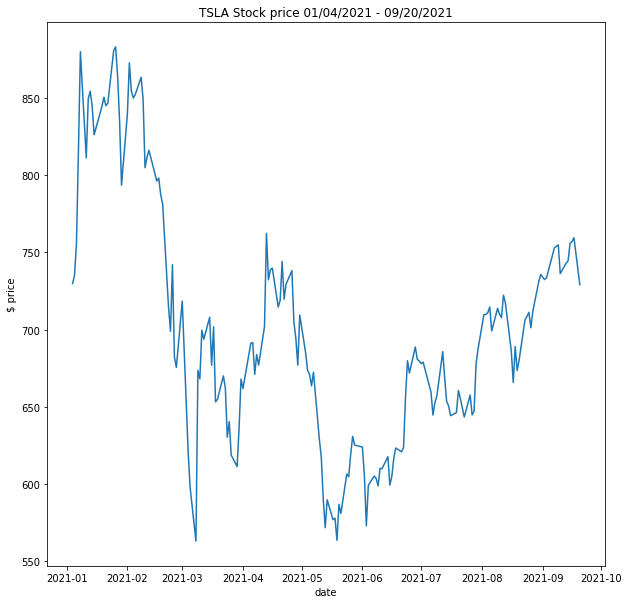

In [7]:
df = df.sort_index()
plt.figure(figsize=(10,10))
plt.plot(df.index, df['Close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title(f'{ticker} Stock price {df.index.min().strftime("%m/%d/%Y")} - {df.index.max().strftime("%m/%d/%Y")}')
plt.annotate('Test', xy=(3,1))

In [13]:
#Gather news stories
from requests import get

#Get first date of search to search google after initial date.
# use df.tail(1) to get most recent date
date = df.head(1).index[0].strftime('%Y-%m-%d')

url = f'https://www.google.com/search?q={ticker}+after:{date}'
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}
r = get(url, headers=header)

results = pd.read_html(r.text)

In [14]:
results

[    0  1  2  3  4  5  6  7  8     9
 0 NaN  1  2  3  4  5  6  7  8  Next]